# Numeros fraccionarios (con punto decimal). Convencion IEEE
IEEE: Institute of electrical and elctronic engineering.

No vimos en la clase anterior lo del signo.
4 bits. El primer bit es el signo. Asumamos un sistema binario.
Si el primer bit es 1, $(-1)^1=-1$ negativo, si es 0 $(-1)^0=1$
positivo. Los otros tres bit determinan el numero.

$$ (1001)= (-1)^1 ( 1 \times 2^0 + 0 \times 2^1 + 0 \times 2^2)=-1$$

Pregunta: Que pasa con los fraccionarios, o de punto flotante (floating point numbers). 

Para entender esto recordemos la representacion en base 10.

$$(528.52)_{10} =  5 \times 10^2 + 2 \times 10^1 + 8 \times 10^0 + 5 \times 10^{-1} + 2 \times 10^{-2} $$

En general

$$(a_n a_{n-1} \cdots a_0 \cdot b_1 b_2 \cdots b_m)_{10} = a_n 10^n + a_{n-1} 10^{n-1} + \cdots + a_0 10^0 + b_1 10^{-1} + b_2 10^{-2} + \cdots + b_m 10^{-m}$$

En general:
$$(a_n a_{n-1} \cdots a_0 \cdot b_1 b_2 \cdots b_m)_{x} = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_0 x^0 + b_1 x^{-1} + b_2 x^{-2} + \cdots + b_m x^{-m}$$
donde $x$ es un numero natural $x \in \mathbb{N}$. 

Por ejemplo. Base $2$, $x=2$.

$$(a_n a_{n-1} \cdots a_0 \cdot b_1 b_2 \cdots b_m)_{2} = a_n 2^n + a_{n-1} 2^{n-1} + \cdots + a_0 2^0 + b_1 2^{-1} + b_2 2^{-2} + \cdots + b_m 2^{-m}$$

Pensemos en como la resolucion del computador funciona. Supongamos que tenemos un computador de juguete con solo 4 bits (sin signo). Como representamos el numero $0.1$ en este juguete.

$$0.1 \approx b_1 2^{-1} + b_2 2^{-2} + b_3 2^{-3} + b_4 2^{-4} $$


El numero mas pequeno que se representa de esta forma es cuando
$b_4=1$, $b_1=b_2=b_3=0$. Este es 0.0625. Nos quedamos cortos.-
Un error por defecto. 0.375.

El siguiente mas pequeno es

$b_1=0, b_2=0, b_3=1, b_4=0$. Este es 0.125. 


un error por exceso: -0.025

Demostracion de que $0.1 + 0.2 \ne 0.3$ en la computacion


In [7]:
## Error de punto flotante en Python. 
a=0.1
b=0.2
esperado = 0.3
a+b == esperado

False

In [12]:
c= a+b
print('a+b =%.4f, a=%.4f\n'%(c,a))

a+b =0.3000, a=0.1000



In [13]:
print('a =%.25f\n'%c)
print('b =%.25f\n'%c)
print('c =%.25f\n'%c)
print('error =%.25f\n'%(0.3-c))


a =0.3000000000000000444089210

b =0.3000000000000000444089210

c =0.3000000000000000444089210

error =-0.0000000000000000555111512



## Por que numeros potencias de 10 no son compatibles con numeros potencias de 2.

La representacion de 0.1 en base dos se encuentra por **multiplicaciones suscesivas** que explicamos a continuacion.

\begin{eqnarray}
 0.1 \times 2 &=& 0.2 \hspace{0.2in}  \text{la parte entera es}  0 \\
 0.2 \times 2 &=& 0.4  \quad \text{la parte entera es } 0 \\
 0.4 \times 2 &=& 0.8 \quad \text{la parte entera es } 0 \\
 0.8 \times 2 &=& 1.6 \quad \text{la parte entera es } 1  \\
 0.6 \times 2 &=& 1.2 \quad \text{la parte entera es } 1 \\
 0.2
\end{eqnarray}

La representacion binaria es $(.00011 0011 0011 0011 \cdots)_2 = (0.0 \overline{0011})$





\begin{eqnarray}
0.875 \times 2 &=& 1.75 \quad \text{parte entera es } 1 \\
0.75 \times 2 &=& 1.5 \quad \text{parte entera es } 1 \\
0.5 \times 2 &=& 1.0  \quad \text{parte entera es} 1 \\
0  \times 2 &=& 0 
\end{eqnarray}

Es semejante a divir 1/3 en decimales

$0.333333.....$ 

Suponga que se tienen 52 bits, cual es el numero mas pequeno

$(.b_1 b_2 \cdots b_{52})_2 = 1 \times 2^{-52}= 2.220446049250313e-16= \epsilon$
Se le llama el $\epsilon$ de la maquina y es el siguiente numero despues de $1.0$.

## como estimar (aproximadamente) potencias de 2 con aproximaciones.

\begin{eqnarray}
2^{10} &=& K = 1024 \approx 1000 = 10^3 \\
2^{16} &=& 2^6 2^{10} = 64 K \approx 64000 \\
2^{32} &=& (2^2) \times 2^{30} = 4 (2^{10})^3 = 4 K^3 = 4 \text{ gigas} \approx 4 \times 10^9 \\
2^{64} &=& 2^4 2^{60} = 16 (2^{10})^6 = 16 K^6 = 16 \text{   hexa } \approx 16 \times 10^{18}
\end{eqnarray}

Recuerde el epsilon de el la maquina, el orden es de $2^{-52}$. 
Por que 52. Lo voy a explicar cuando explique el IEEE.

$$2^{-52} = 2^{-50} \times 2^{-2} = \frac14 (2^{10})^{-5} = \frac14 K^{-5} \approx \frac14 10^{-15}$$


Formato IEEE. Que pensaron estos ingenieros para proponer este formato de numeros en el computador. No pensaron algo muy distinto a lo que ya se trae en notacion decimal

$$ 342.23 = 3.4223 \times 10^2 $$
El primer digito esta entre 1,9. Lo que sigue es la mantisa 0.4223 y el exponente (caracteristica) (2) de la base 10. 

Ejemplo. Dado una parte entera de 3, mantisa de 2342 y exponente de 4 escriba el numero en representacion **cientifica** decimal

$$3.2342 \times 10^4 $$

La IEEE (como explique en las notas a mano alzada) define el numero decimal como

$$N_{10} = (-1)^s 2^{c-1023} (1 + f) $$
donde

* $s$ es el signo
* $c$ es la caracteristica que tiene 11 bits
* $f$ es la mantisa. (52 bits)

$f = b_1 2^{-1} + b_2 2^{-2} + \cdots b_{52} 2^{-52}$.








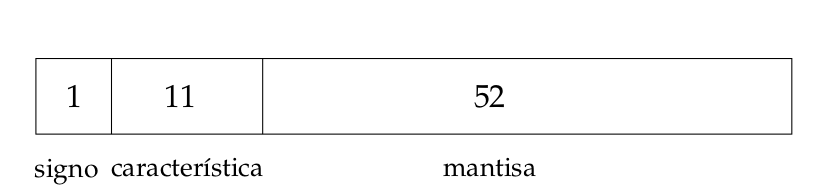

**Ejemplo**:
Asuma el siguiente numero en base binaria:

$$(0100000010001001110 · · · 0)_2 $$
Cual es el equivalente decimal representado por el formato IEEE.

* Primer paso. El **signo**. $s=0$, $(-1)^s = (-1)^0 = 1$.
* Segundo paso. La caracteristica 

$$ c =(10000001000)_2 =  2^3 + 2^{10} =8 + 1024  = 1032$$.
El exponente es:

$$2^{c-1023} = 2^{1032-1023} = 2^9$$.

* $$f=(.1001110 \cdots 0)_2 = \frac12 + \left ( \frac12 \right )^4 + \left ( \frac12 \right )^5  + \left ( \frac12 \right )^6 = 0.609375 $$


* El numero en cuestion es:

$$ (-1)^s 2^9 \times (1 +0.609375) = 824 $$